In [1]:
import pandas as pd
grains = pd.read_csv('seeds.csv', header = None)
samples = grains.loc[:, 0:6].values.reshape(210, 7)
varieties = grains.loc[:, 7].values
stock = pd.read_csv('stock.csv', index_col = 0)
movements = stock.values.reshape(60, 963)
companies = stock.index

## T-SNE (LIKE PCA)

Samples has 7 features => 7-dimensional => t-SNE maps 'samples' to 2D

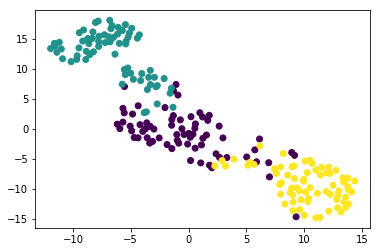

In [3]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
import matplotlib.pyplot as plt
plt.scatter(xs, ys, c = varieties)
plt.show()

## T-SNE ON STOCK

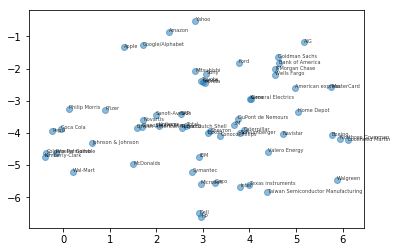

In [7]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()